<h2>Simulation for Drone Air Time Comprisons</h2>

<h4>Variables (Assigned estimated values)</h4>

In [1]:
total_time = 1440 #24 hours converted into minutes
total_charge_1 = 20 #charging time for the drones is taken as 20 minutes
total_charge_2 = 20 #charging time for the drones is taken as 20 minutes
warning_time_1 = 2 #time at which the drone of model 1 starts its approach towards their respective charging station
warning_time_2 = 4 #time at which the drone of model 2 starts its approach towards their respective charging station
time_to_charge = 30 #time taken by drones to charge fully is 30 minutes
air_time_1 = 0
air_time_2 = 0
time_to_leave_zone = 1 #time taken by drones to leave their assigned surveillance zones 

In [2]:
import random

<h4>Air time calculation of drone of Model 1 over 7 days:</h4> 

In [3]:
airtime1 = []
for i in range (0,7):
    air_time_1 = 0
    time = 0.0
    while time <= 1440  and time >= 0:
        time = time + 0.5
        total_charge_1 = total_charge_1 - 0.5
        if (total_charge_1 == warning_time_1):
            air_time_1 = air_time_1 + time_to_leave_zone
            time = time + time_to_leave_zone
            time_to_reach_station = random.choice([1,1.5,2])
            time = time + time_to_reach_station
            queue_wait_time = random.choice([0.5,1])
            time = time + queue_wait_time
            time = time + time_to_charge + time_to_reach_station
            total_charge_1 = 20
            total_charge_1 = total_charge_1 - time_to_reach_station
            air_time_1 = air_time_1 + time_to_leave_zone
            total_charge_1 = total_charge_1 - time_to_leave_zone
            time = time + time_to_leave_zone
            
        if (total_charge_1 > warning_time_1):
            air_time_1 = air_time_1 + 0.5
        
        if (total_charge_1 < warning_time_1):
            pass
            
    airtime1.append(air_time_1)
    print(airtime1[i])

489.0
495.5
497.5
498.5
503.0
500.0
502.0


<h4>AIr time calculation of drone of Model 2 over 7 days:</h4>

In [4]:
airtime2 = []
for i in range (0,7):
    air_time_2 = 0
    time = 0.0
    while time <= 1440  and time >= 0:
        time = time + 0.5
        total_charge_2 = total_charge_2 - 0.5
        if (total_charge_2 == warning_time_2):
            air_time_2 = air_time_2 + time_to_leave_zone
            time = time + time_to_leave_zone
            time_to_reach_station = random.choice([1,1.5,2,2.5,3,3.5,4])
            time = time + time_to_reach_station
            queue_wait_time = random.choice([0.5,1])
            time = time + queue_wait_time
            time = time + time_to_charge + time_to_reach_station
            total_charge_2 = 20
            total_charge_2 = total_charge_2 - time_to_reach_station
            air_time_2 = air_time_2 + time_to_leave_zone
            total_charge_2 = total_charge_2 - time_to_leave_zone
            time = time + time_to_leave_zone
            
        if (total_charge_2 > warning_time_2):
            air_time_2 = air_time_2 + 0.5
        
        if (total_charge_2 < warning_time_2):
            pass
            
    airtime2.append(air_time_2)
    print(airtime2[i])

419.5
419.5
427.5
417.0
427.5
421.5
426.0


<h4>Converting the respective air times into hours:</h4>

In [5]:
#The flight time in hours
airtime1_hours = []
airtime2_hours = []
for i in range(0, len(airtime1)):
    x = airtime1[i]/60
    airtime1_hours.append(x)
for i in range(0, len(airtime2)):
    x = airtime2[i]/60
    airtime2_hours.append(x)
print(airtime1_hours)
print(airtime2_hours)

[8.15, 8.258333333333333, 8.291666666666666, 8.308333333333334, 8.383333333333333, 8.333333333333334, 8.366666666666667]
[6.991666666666666, 6.991666666666666, 7.125, 6.95, 7.125, 7.025, 7.1]


<h4>The graph plot:</h4>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

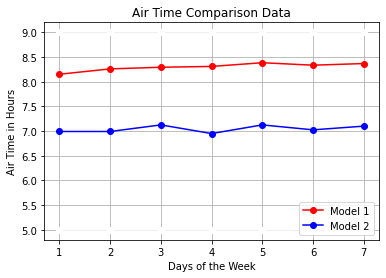

In [14]:
#Plotting the airtime comparison graph
xpoints = np.array([1,2,3,4,5,6,7])
ypoints1 = np.array(airtime1_hours)
ypoints2 = np.array(airtime2_hours)
ypoints3 = np.array([5,5,5,5,5,5,5])
ypoints4 = np.array([9,9,9,9,9,9,9])
plt.plot(xpoints, ypoints1, marker = 'o', color = 'r', label ='Model 1')
plt.plot(xpoints, ypoints2, marker = 'o', color = 'b', label ='Model 2')
plt.plot(xpoints, ypoints3, marker = 'o', color = 'w')
plt.plot(xpoints, ypoints4, marker = 'o', color = 'w')
plt.title("Air Time Comparison Data")
plt.xlabel("Days of the Week")
plt.ylabel("Air Time in Hours")
plt.legend(loc ="lower right")
plt.grid()
plt.show()

<h4>Calculating the average difference in airtimes:</h4>

In [8]:
diff_airtime = 0
for i in range (0, len(airtime1_hours)):
    x = airtime1_hours[i] - airtime2_hours[i]
    diff_airtime = diff_airtime + x
avg_diff_airtime = diff_airtime / 7
print("The average difference in airtimes of two models is:: ",avg_diff_airtime)

The average difference in airtimes of two models is::  1.254761904761905
